#Funciones de probabilidad


In [ ]:
### LIBRERIAS
#@title Posibles librerias a utilizar { run: "auto" }
## librerias para el funcionamiento del paquete
import numpy as np
import matplotlib.pyplot as plt
import math
#%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
import warnings
warnings.filterwarnings("ignore", message="""Caught 'unbalanced parenthesis at position 119' compiling regex""", category=UserWarning )
from scipy.optimize import fmin
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
from scipy.special import factorial

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
# Bin continuous data into intervals.
from sklearn.base import BaseEstimator, TransformerMixin
from numpy.lib.shape_base import apply_over_axes

from scipy.stats import norm
from sklearn.neighbors import KernelDensity

import os
import sys
import pandas as pd
# import pandas_datareader.data as web

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

from statsmodels.tsa import ar_model, arima_process, arima, arima_model
from statsmodels.tsa.ar_model import AutoReg
#!pip install numpy scipy patsy pandas
#!pip install statsmodels --upgrade

<ipython-input-70-01a41b1d76f4>:37: UserWarning: DelftStack
  warnings.warn('DelftStack')


FUNCIONES DE DENSIDAD EXPONENECIAL Y UNIFORME

In [ ]:
from scipy.optimize.nonlin import LinearMixing
class EXPOUNIFORM():
  """
  
        class that is in charge of handling the estimation by maximum likelihood, 
        for which 3 parameters are entered:
         --------------------------------------
         --------------------------------------
         Parameters
         --------------------------------------------
         X_function_Estimate {ndarray} -- Array that have the function 
         that needs to be estimated under some probability model.

         plot{Boolean}-- Parameter that indicate if the user want to plot the 
         log likely hood function. [default:True]

         hist{Boolean}-- Parameter that indicate if the user want to plot the 
         histogram with the estimate function. [default:True]


  """
  def __init__(self,X_function_estimate: np.array,plot=True,hist=True):
    self.X_function_estimate=X_function_estimate
    self.plot=plot
    self.hist=hist
    self.N=len(self.X_function_estimate)

  def Exponential(self,lambda_limits:np.array,espace : float =0.10):
    """
      Function that make the EXPO_UNIFORM with a Exponential distribution
      ---------------------------------------------------------------
      Parameters
      ---------------------------------------------------------------
      lambda_limits{np.array}--array with 2 values that means the limits of the arrays of
      possible lambdas.

      espace{float}--constant  for the spacing of the vector of lambdas

      Returns
      ---------------------------------------------------------------
      lambda_estimate{float}-- THE ESTIMATED lambda FOR THE FUNCTION 
      estimated_exponential{np.array}-- THE ESTIMATED DISTRIBUTION

    """
    
    lambdas = np.arange(lambda_limits[0], lambda_limits[1], espace)
    log_estimation=self.N*np.log(lambdas)-lambdas*np.sum(self.X_function_estimate)
    posicionmax=np.where( log_estimation== np.amax(log_estimation))
    lambda_estimate=lambdas[posicionmax]
    estimated_exponential=np.random.exponential(1/lambda_estimate,size=self.N)
    if(self.plot):
      fig=plt.figure(figsize=(6,6))
      plt.plot(lambdas, log_estimation)
      #ax=Axes3D(fig)
      #ax.plot_surface(Lambda,espace,log_estimation)
      plt.xlabel('$\lambda$')
      plt.ylabel('log likely hood exponential')
      plt.plot(lambda_estimate,log_estimation[posicionmax],color="green",label="Lambda Estimated: {}".format(lambda_estimate),marker='o')
      plt.legend()
      plt.show()
    

    if(self.hist):
      Nbins = int(1 + 3.322*np.log2(self.N))
      plt.figure(figsize=(8,8))
      plt.hist(self.X_function_estimate,bins=Nbins,color="orange",label="Original")
      plt.hist(estimated_exponential,bins=Nbins,color="blue",label="Estimation-lambda{}".format(lambda_estimate))
      plt.legend()
      plt.title("original and estimated comparison")
    
    return lambda_estimate,estimated_exponential
  


  def Uniform(self,vectorA, vectorb, n):
     ## GENERAMOS VECTOR DE A Y B
     A = np.linspace(vectorA[0], vectorA[1], n)
     B = np.linspace(vectorb[0], vectorb[1], n)
     A, B = np.meshgrid(A, B) ## GENERO LAS COMBINACIONES POSIBLES PARA A Y B
     log = -self.N*np.log(B-A)
     posicionmax=np.where( log== np.amax(log))
     A_estimate=A[posicionmax[0],posicionmax[1]]
     B_estimate=B[posicionmax[0],posicionmax[1]]
     ## GENERAMOS LA UNIFORME ESTIMADA
     UniformEstimate= np.random.uniform(A_estimate,B_estimate,self.N); 
     if(self.plot):
      fig=pl.figure(figsize=(6,6))
      ax=Axes3D(fig)
      ax.plot_surface(A,B,log)
      pl.title("log likely hood of uniform [A and B] ")
      pl.show()
    #  if(self.hist):
    #    Nbins = int(1 + 3.322*np.log2(self.N))
    #    plt.figure(figsize=(8,8))
    #    plt.hist(self.X_function_estimate,bins=Nbins,color="orange",label="Original")
    #    plt.hist(UniformEstimate,bins=Nbins,color="blue",label="Estimation-A {}-B {}".format(A_estimate,B_estimate))
    #    plt.legend()
    #    plt.title("original and estimated comparison")
    #    plt.show()
     return A_estimate,B_estimate,UniformEstimate

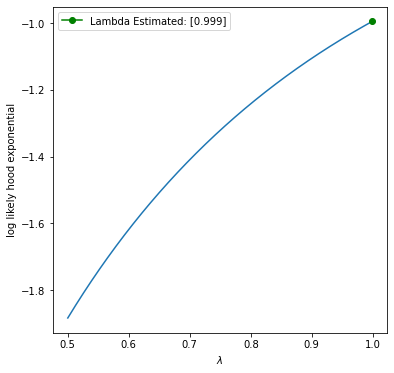

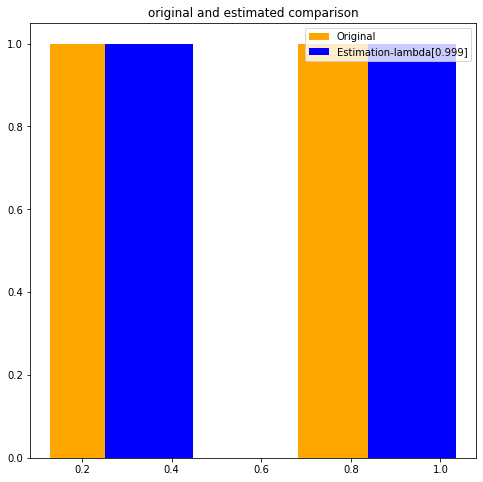

In [ ]:
if __name__=="__main__":

  """
  Exponential
  """
# parametros (self,lambda_limits:np.array,espace : float =0.10)
  N =  4096 # // numero de muestras 
  Lambda=[0.5,1]
  x = np.random.exponential(Lambda) ## FDP EXPONENCIAL   
  EXPO1= EXPOUNIFORM(x) ## TENGO MIS DATOS GUARDADOS 
  espace=0.001
  lambda_estimate,estimated_exponential=EXPO1.Exponential(Lambda,espace)

In [ ]:
if __name__=="__main__":

  """
  UNIFORM
  """
# Parametros(self,vectorA, vectorb, n)
  va=[1,0]
  vb=[1,0]
  N= [400,0]
  x = np.random.uniform(va[0],vb[0],N[0]) ## FDP UNIFORM   
  UNI1= EXPOUNIFORM(x) ## TENGO MIS DATOS GUARDADOS 
  A_estimate,B_estimate,UniformEstimate=UNI1.Uniform(va,vb,N[0])

<ipython-input-71-5e01f0556fc9>:80: RuntimeWarning: divide by zero encountered in log
  log = -self.N*np.log(B-A)
<ipython-input-71-5e01f0556fc9>:80: RuntimeWarning: invalid value encountered in log
  log = -self.N*np.log(B-A)


ValueError: ignored